In [18]:
# To load the mnist data
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential

# importing various types of hidden layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Adam optimizer for better LR and less loss
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
# Split the data into training and testing
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# Print the dimensions of the dataset
print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)


Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


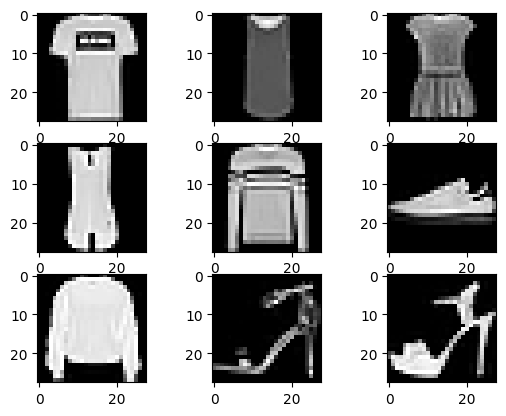

In [9]:
for i in range(1, 10):

	# Create a 3x3 grid and place the
	# image in ith position of grid
	plt.subplot(3, 3, i)
	
	# Insert ith image with the color map 'grap'
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

# Display the entire plot
plt.show()


In [10]:
def model_arch():
	models = Sequential()

	# We are learning 64
	# filters with a kernal size of 5x5
	models.add(Conv2D(64, (5, 5),
					padding="same",
					activation="relu",
					input_shape=(28, 28, 1)))

	# Max pooling will reduce the
	# size with a kernal size of 2x2
	models.add(MaxPooling2D(pool_size=(2, 2)))
	models.add(Conv2D(128, (5, 5), padding="same",
					activation="relu"))

	models.add(MaxPooling2D(pool_size=(2, 2)))
	models.add(Conv2D(256, (5, 5), padding="same",
					activation="relu"))

	models.add(MaxPooling2D(pool_size=(2, 2)))

	# Once the convolutional and pooling
	# operations are done the layer
	# is flattened and fully connected layers
	# are added
	models.add(Flatten())
	models.add(Dense(256, activation="relu"))

	# Finally as there are total 10
	# classes to be added a FCC layer of
	# 10 is created with a softmax activation
	# function
	models.add(Dense(10, activation="softmax"))
	return models


In [11]:
model = model_arch()

model.compile(optimizer=Adam(learning_rate=1e-3),
			loss='sparse_categorical_crossentropy',
			metrics=['sparse_categorical_accuracy'])

model.summary()


/home/kast/m-eng-robotics/image-recognition/thd-mro-image-recognition/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1745337216.241594   16622 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1745337216.242421   16622 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 256)      │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,618,698 (6.17 MB)

 Trainable params: 1,618,698 (6.17 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.fit(
	trainX.astype(np.float32), trainy.astype(np.float32),
	epochs=10,
	steps_per_epoch=100,
	validation_split=0.33
)


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 89s 894ms/step - loss: 0.9754 - sparse_categorical_accuracy: 0.6638 - val_loss: 0.4280 - val_sparse_categorical_accuracy: 0.8471
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 86s 861ms/step - loss: 0.3997 - sparse_categorical_accuracy: 0.8556 - val_loss: 0.3492 - val_sparse_categorical_accuracy: 0.8715
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 83s 836ms/step - loss: 0.3294 - sparse_categorical_accuracy: 0.8800 - val_loss: 0.3305 - val_sparse_categorical_accuracy: 0.8797
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 79s 789ms/step - loss: 0.2892 - sparse_categorical_accuracy: 0.8934 - val_loss: 0.2898 - val_sparse_categorical_accuracy: 0.8940
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 80s 801ms/step - loss: 0.2436 - sparse_categorical_accuracy: 0.9118 - val_loss: 0.2804 - val_sparse_categorical_accuracy: 0.8968
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 81s 808ms/step - loss: 0.2258 - sparse_categorical_accuracy: 0.9179 - val_loss: 0.2730 - val_sparse_categorical_acc

In [14]:
test_loss, test_acc = model.evaluate(testX,  testy, verbose=2)

313/313 - 8s - 24ms/step - loss: 0.3077 - sparse_categorical_accuracy: 0.8952


In [15]:
# store the different labels into the arrays to be used later
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [19]:
probability_model = Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [20]:
predictions = probability_model.predict(testX)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step


In [22]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

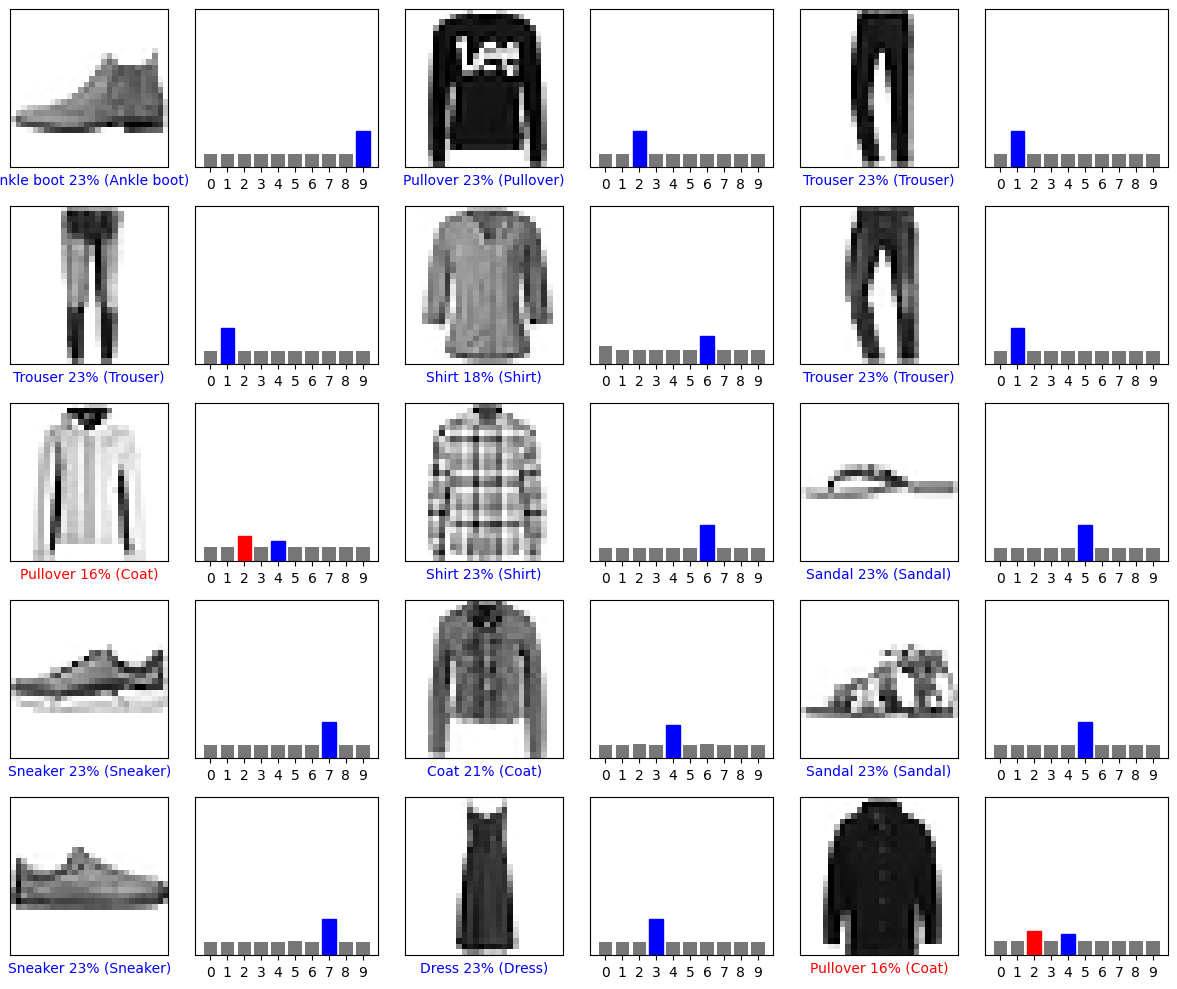

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], testy, testX)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], testy)
plt.tight_layout()
plt.show()